In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

plt.style.use('dark_background')
colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid',
          'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])


In [32]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=.01)

In [33]:
X[:10]

array([[-0.51632761, -0.61610023],
       [-0.38516838,  0.69980854],
       [ 0.7029553 , -0.3900414 ],
       [ 0.09894454,  0.78356924],
       [-0.17193469,  0.99457786],
       [-0.87584206,  0.49771423],
       [ 0.23720505,  0.97373646],
       [-0.79431727, -0.00718173],
       [-0.7879964 ,  0.20517846],
       [ 0.0190902 ,  0.98700391]])

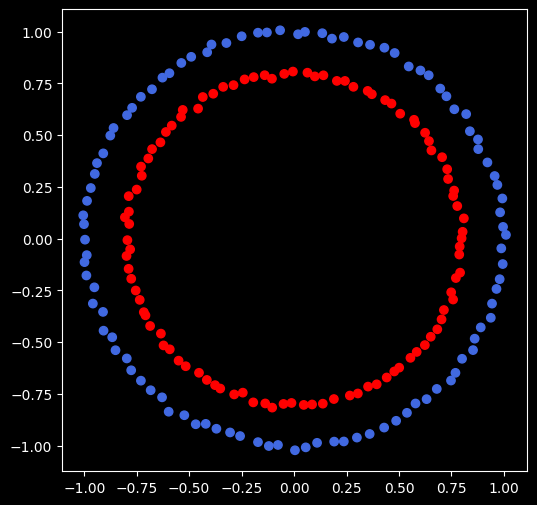

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(y))

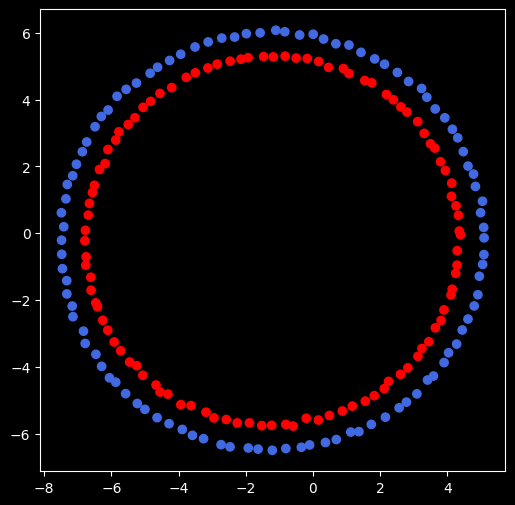

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
plt.figure(figsize=(6,6))
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=vectorizer(y))

In [38]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X)

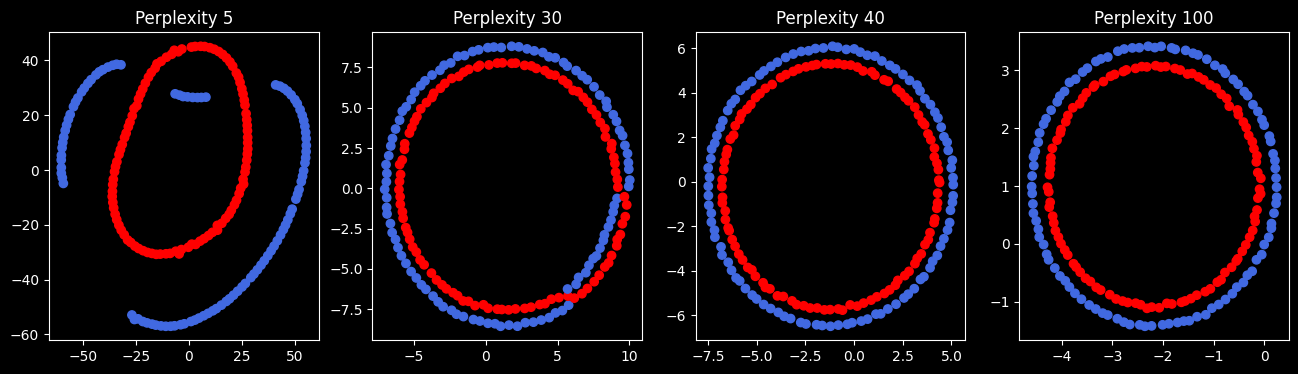

In [39]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1], c=vectorizer(y))

plt.subplot(142)
plt.gca().set_title('Perplexity 30')
plt.scatter(X_30[:,0], X_30[:,1], c=vectorizer(y))

plt.subplot(143)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1], c=vectorizer(y))

plt.subplot(144)
plt.gca().set_title('Perplexity 100')
plt.scatter(X_100[:,0], X_100[:,1], c=vectorizer(y))

#### PCA and TSNE in MNIST

In [41]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist['data']
y = mnist['target']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95)

In [45]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X_train)

In [46]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X_train)

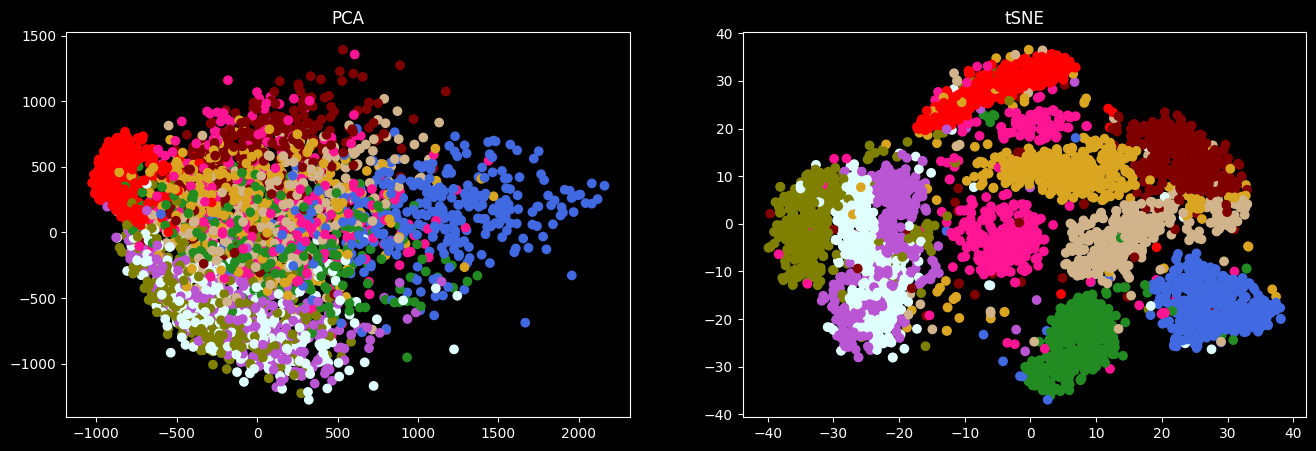

In [48]:
plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
plt.gca().set_title('PCA')
scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=vectorizer(y_train), label=y_train)
ax2 = plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1], c=vectorizer(y_train), label=y_train)

#### Making Swissroll

In [49]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

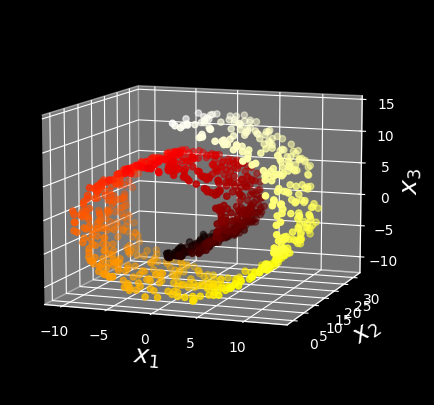

In [55]:
axes = [-11.5, 14, -2, 33, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

In [56]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

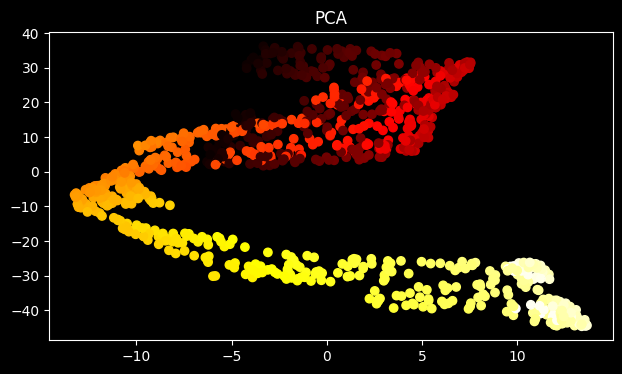

In [57]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_tsne[:,1], c=t, cmap=plt.cm.hot)
plt.show()